## Introduccion a analitica avanzada
### Laboratorio 1
#### Modelo de Clasificacion-Analizaremos el dataset del titanic

In [9]:
#importamos librerias
import pandas as pd
import numpy as np
#pip install scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
#!pip install statsmodels
import statsmodels
import statsmodels.api as sm

In [10]:
#Cargaremos la base de datos
df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

In [11]:
#mostraremos los primeros 5 registros
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
df['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [14]:
#armemos nuestra base de datos

In [15]:
Variable_target = ['Survived']
variables_seleccionadas = ['Pclass' , 'Sex', 'Age', 'Fare']

In [16]:
Variable_target+ variables_seleccionadas

['Survived', 'Pclass', 'Sex', 'Age', 'Fare']

In [17]:
df_modelo = df[Variable_target+ variables_seleccionadas]

In [18]:
df_modelo.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [19]:
#Revisemos la calidad de datos
df_modelo.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
dtype: int64

In [20]:
#Eliminemos la edad que tenga nulos porque no tenemos datos y no se pueden imputar
df_modelo.dropna(inplace = True)

C:\Users\LUIGGI\AppData\Local\Temp\ipykernel_5372\897176975.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_modelo.dropna(inplace = True)


In [21]:
#crearemos algunas transformaciones de las variables, los modelos de machine learning no admiten variables
# String por lo que tendremos que transformarlas a variables numericas
#Creamos la variable sexo numerica
df_modelo['Sex2'] = np.where(df_modelo['Sex'] == "male", 0, 1)

C:\Users\LUIGGI\AppData\Local\Temp\ipykernel_5372\1808299564.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_modelo['Sex2'] = np.where(df_modelo['Sex'] == "male", 0, 1)


In [22]:
df_modelo['Sex'].unique()

array(['male', 'female'], dtype=object)

In [23]:
#Creamos una variable que capture si la persona era mayor de edad o no
df_modelo['Age_Menor'] = np.where(df_modelo['Age'] <= 18, 1, 0)

C:\Users\LUIGGI\AppData\Local\Temp\ipykernel_5372\389764766.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_modelo['Age_Menor'] = np.where(df_modelo['Age'] <= 18, 1, 0)


In [24]:
#Eliminamos las variables que no consideremos en el modelo
df_modelo.drop(['Sex'], axis=1, inplace=True)

C:\Users\LUIGGI\AppData\Local\Temp\ipykernel_5372\2567157712.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_modelo.drop(['Sex'], axis=1, inplace=True)


In [25]:
#Crearemos 2 dataset, 1 de entrenamiento y otro de test donde validaremos que tan bueno es nuestro modelo.
y = df_modelo['Survived']
X = df_modelo.drop(['Survived'], axis= 1) #IMPORTANTE, NUNCA PERO NUNCA TENGAN LA VARIABLE OBJETIVO O TARGET ADENTRO DE SUS VARIABLES EXPLICATIVA
x_train, x_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=0)

In [26]:
#Construimos nuestro primer modelo
modeloLR = LogisticRegression()
modeloLR.fit(x_train, y_train)

LogisticRegression()

In [27]:
#Eevisamos sus parametros
print("Coeficientes sklearn:", modeloLR.intercept_, modeloLR.coef_)

Coeficientes sklearn: [2.08740074] [[-1.10439282 -0.03414253  0.00249672  2.27655763 -0.12527147]]


In [43]:
#creamos las predicciones del modelo
predictions = modeloLR.predict(x_test)

In [44]:
predictions

array([1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1], dtype=int64)

In [45]:
#Calculemos el score del modelo (accuracy)
modeloLR.score(x_test, y_test)

0.8531468531468531

In [46]:
# modelo con la libreria stats models
x_train_constrain = x_train
x_train_constrain = sm.add_constant(x_train_constrain) # adding a constant
Logitmod = sm.Logit( y_train, x_train_constrain).fit()
print(Logitmod.summary())

Optimization terminated successfully.
         Current function value: 0.462611
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  571
Model:                          Logit   Df Residuals:                      565
Method:                           MLE   Df Model:                            5
Date:                Tue, 17 Jan 2023   Pseudo R-squ.:                  0.3108
Time:                        22:00:53   Log-Likelihood:                -264.15
converged:                       True   LL-Null:                       -383.30
Covariance Type:            nonrobust   LLR p-value:                 1.787e-49
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2112      0.654      3.381      0.001       0.929       3.493
Pclass        -1.1575      0.

In [47]:
#efectos marginales
Logitmod.get_margeff().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
        Logit Marginal Effects       
=====================================
Dep. Variable:               Survived
Method:                          dydx
At:                           overall
==============================================================================
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Pclass        -0.1726      0.023     -7.498      0.000      -0.218      -0.127
Age           -0.0053      0.002     -3.340      0.001      -0.008      -0.002
Fare           0.0003      0.000      0.858      0.391      -0.000       0.001
Sex2           0.3583      0.020     18.068      0.000       0.319       0.397
Age_Menor     -0.0230      0.053     -0.435      0.663      -0.126       0.080
==============================================================================
"""

In [ ]:
1       2       3
-17%   -34% 

In [ ]:
-34% 51%

### Laboratorio 2
#### Regresion lineal

In [49]:
#Importamos librerias
import sklearn as skl
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import seaborn as sns

In [50]:
# Los datos cargados desde la librería Sklearn contienen una descripción del
# dataset que estamos cargando, almacenado en el atributo DESCR.
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
Y = housing.target
X = pd.DataFrame(housing.data, columns =['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'])

In [51]:
#validamos los datos
X.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

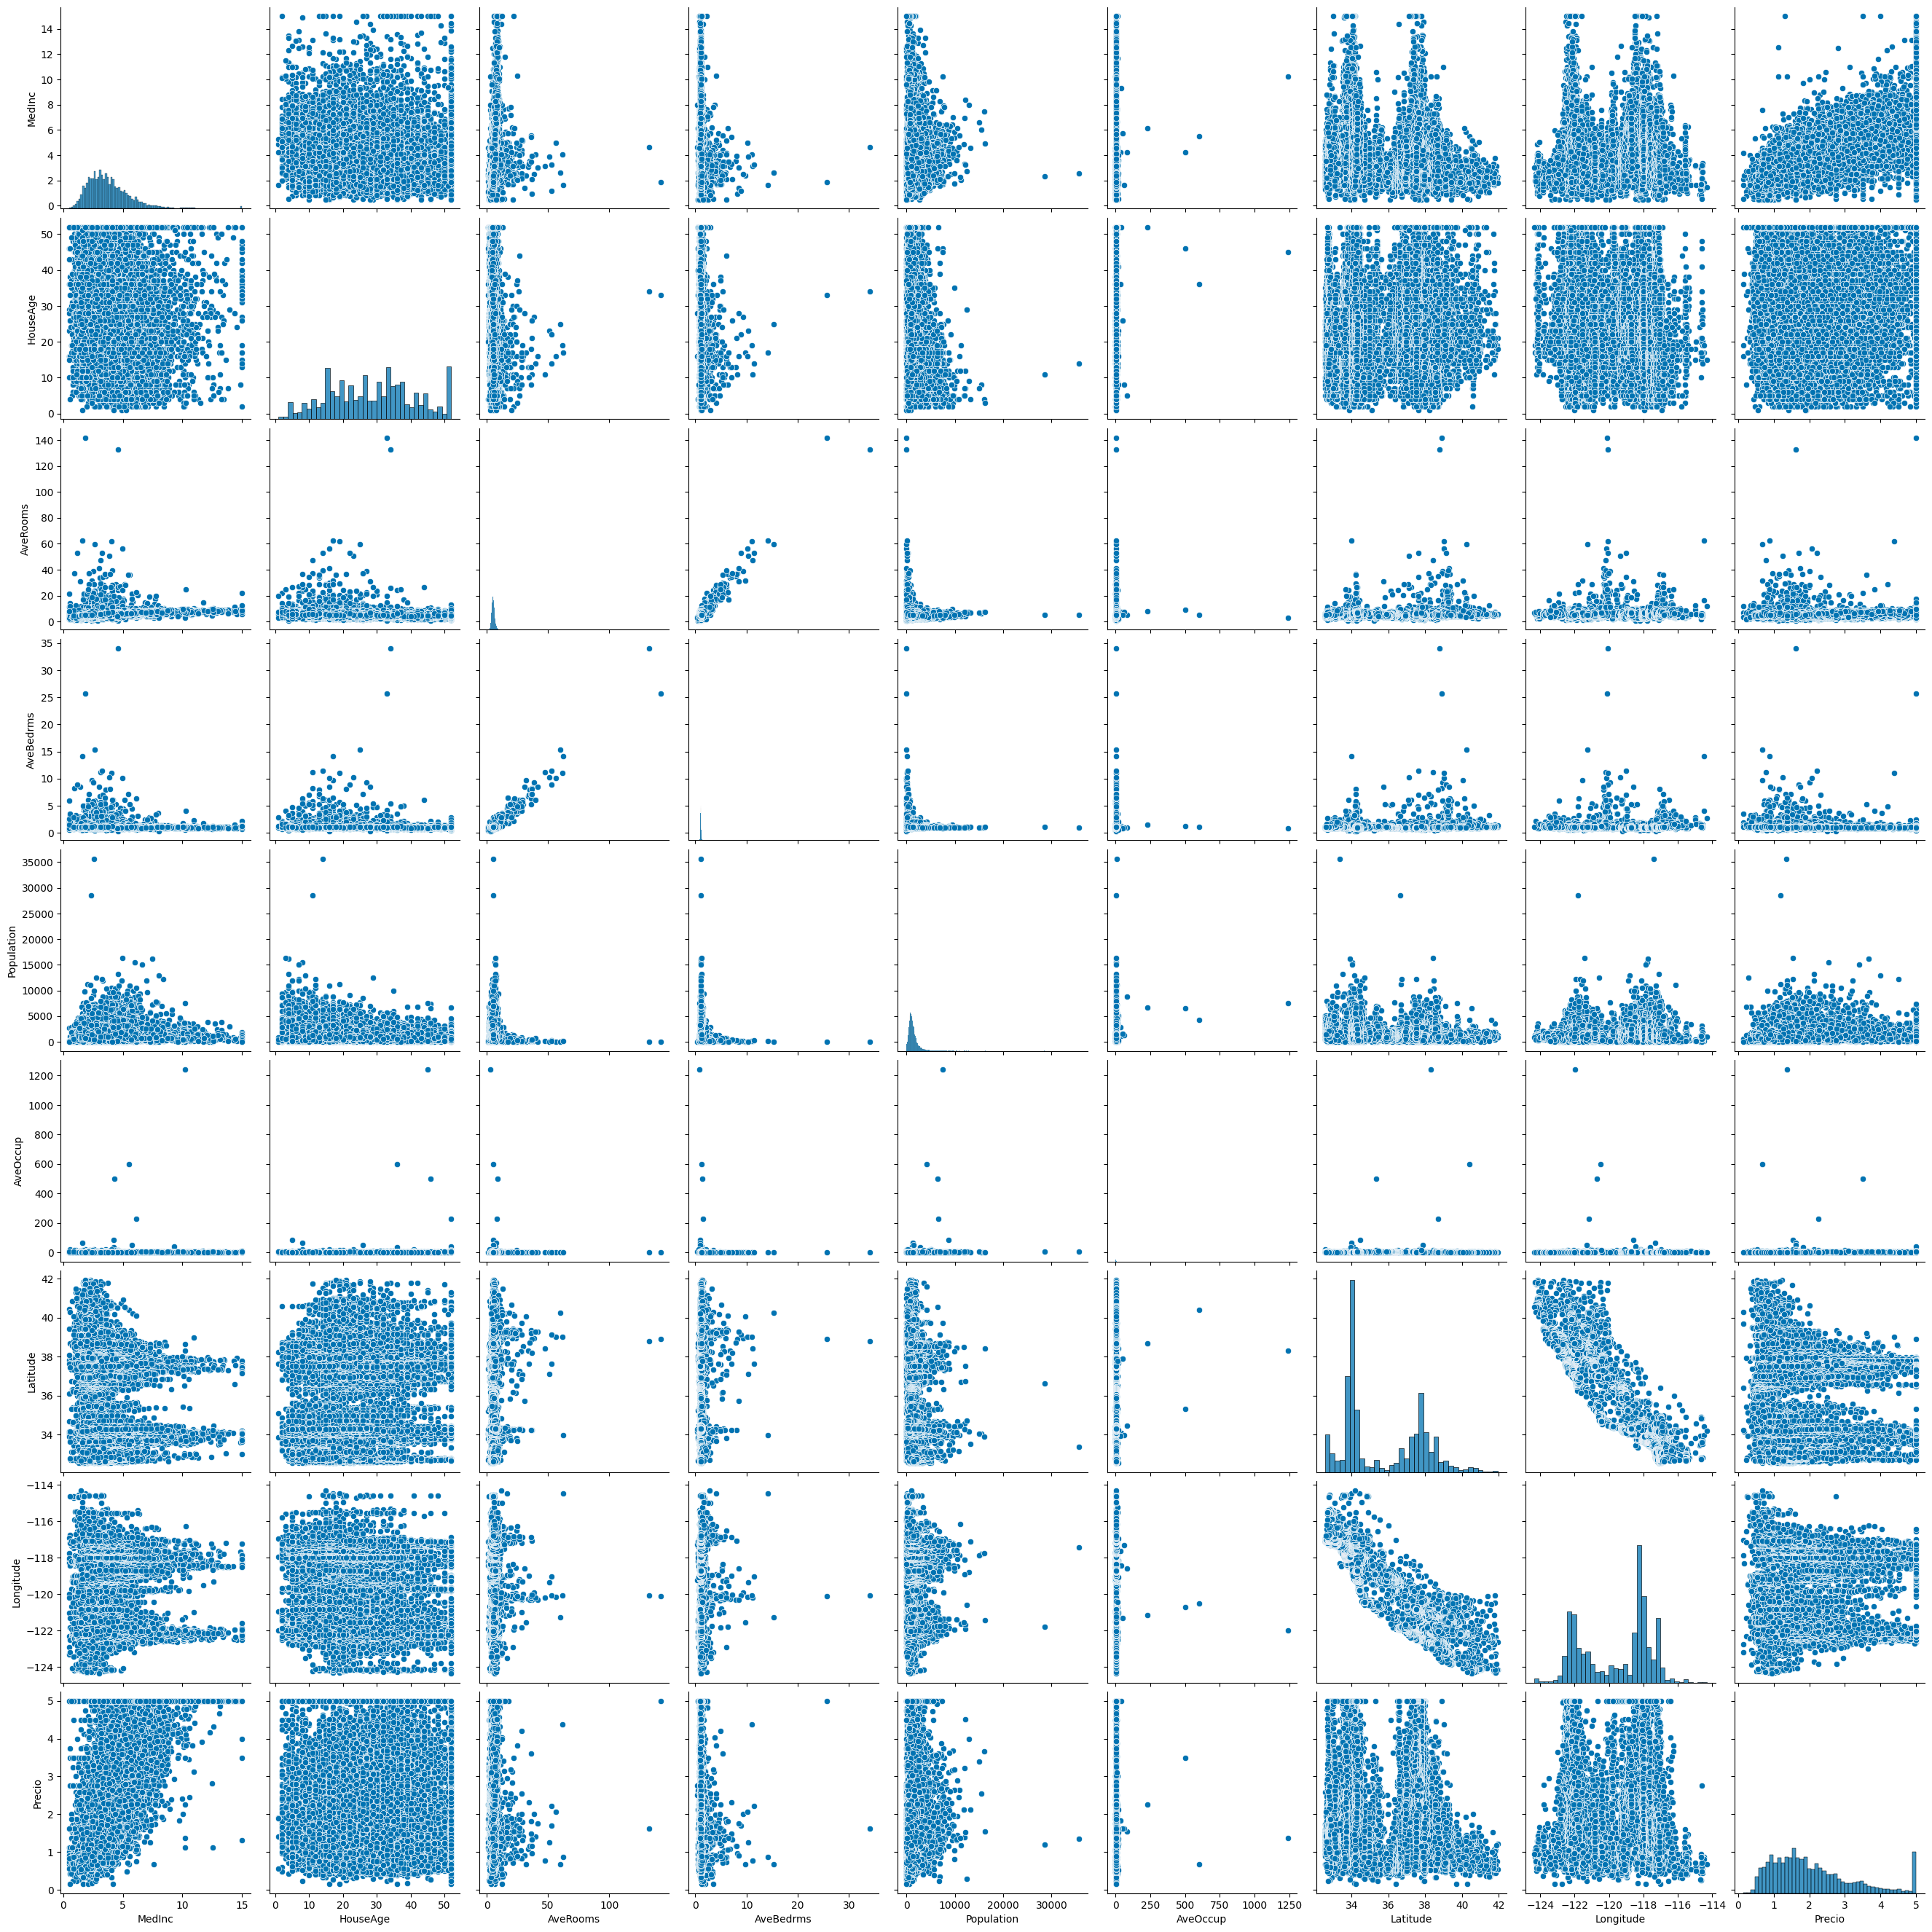

In [103]:
#revisamos rapidamente algunos patrones
data_review = X
data_review['Precio'] = Y
sns.set_palette('colorblind')
sns.pairplot(data = data_review, height=3)


In [52]:
#Crearemos 2 dataset, 1 de entrenamiento y otro de test donde validaremos que tan bueno es nuestro modelo.

x_train, x_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=0)

In [53]:
#Creamos el modelo y lo entrenamos
model = linear_model.LinearRegression().fit(x_train, y_train)
#Eevisamos sus parametros
print("Coeficientes sklearn:", model.intercept_, model.coef_)
#Revisamos la estimacion de las metricas
print("Error RLM:", mean_squared_error(y_test, model.predict(x_test)))


Coeficientes sklearn: -36.858569106801326 [ 4.33333407e-01  9.29324337e-03 -9.86433739e-02  5.93215487e-01
 -7.56192502e-06 -4.74516383e-03 -4.21449336e-01 -4.34166041e-01]
Error RLM: 0.5289841670367214


In [107]:
# modelo con la libreria stats models
x_train_constrain = x_train
x_train_constrain = sm.add_constant(x_train_constrain) # adding a constant
olsmod = sm.OLS( y_train, x_train_constrain).fit()
print(olsmod.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     3969.
Date:                Mon, 16 Jan 2023   Prob (F-statistic):               0.00
Time:                        17:08:37   Log-Likelihood:                -22614.
No. Observations:               20632   AIC:                         4.525e+04
Df Residuals:                   20623   BIC:                         4.532e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -36.9358      0.659    -56.043      0.0

### Tarea

In [31]:
## Realice un modelo que permita predecir el cancer de seno con la siguiente informacion
#Se carga la data
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
Y = data.target
X = pd.DataFrame(data.data, columns =data.feature_names)
#Consttruya su modelo de prediccion

In [34]:
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [35]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,